 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [316]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [317]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

/var/folders/jp/x_d0tm_j75v5bcxxbpv_nllh0000gp/T/ipykernel_53820/545599946.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [318]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [319]:
# Drop nulls
whale_df_full = whale_df.dropna()
whale_df_full.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [320]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

/var/folders/jp/x_d0tm_j75v5bcxxbpv_nllh0000gp/T/ipykernel_53820/3586740815.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [321]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [322]:
# Drop nulls
algo_df_full = algo_df.dropna()
algo_df_full.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [323]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
# added DateTimeIndex conversion to all 3 dataframes bc of encountered TypeError
sp500_df.head()

/var/folders/jp/x_d0tm_j75v5bcxxbpv_nllh0000gp/T/ipykernel_53820/2977811894.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
/var/folders/jp/x_d0tm_j75v5bcxxbpv_nllh0000gp/T/ipykernel_53820/2977811894.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06

In [324]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [325]:
# Fix Data Types
'''sp500_df['Close'] = sp500_df['Close'].astype('float64')
sp500_df.dtypes''' # commented bc I can't turn close price to float yet without removing '$' symbol

sp500_df['Close'] = sp500_df['Close'].str.replace('$', '') # replace $ with nothing
sp500_df['Close'] = sp500_df['Close'].astype('float64')
sp500_df.dtypes

Close    float64
dtype: object

In [326]:
# Calculate Daily Returns
daily_returns_df = sp500_df.pct_change()
daily_returns_df.head()

Close
Date                
2019-04-23       NaN
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279

In [327]:
# Drop nulls
daily_returns_df_full = daily_returns_df.dropna()
daily_returns_df_full.isnull().sum()

Close    0
dtype: int64

In [328]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_df_full = daily_returns_df_full.rename(columns={'Close': 'sp500_return'})
daily_returns_df_full.head()

sp500_return
Date                    
2019-04-22     -0.008764
2019-04-18     -0.001011
2019-04-17     -0.001577
2019-04-16      0.002279
2019-04-15     -0.000509

## Combine Whale, Algorithmic, and S&P 500 Returns

In [329]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df_full, algo_df_full, daily_returns_df_full], axis='columns', join='inner')
combined_df.sort_index(inplace=True)
combined_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2  sp500_return  
Date                                
2015-03-03 -0.000949      0.004408  
2015-03-04  0.002416     -0.001195  
2015-03-05  0.004323      0.014378  
2015-03-06 -0.011460     -0.003929  
2015-03-09  0.001303      0.017254

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

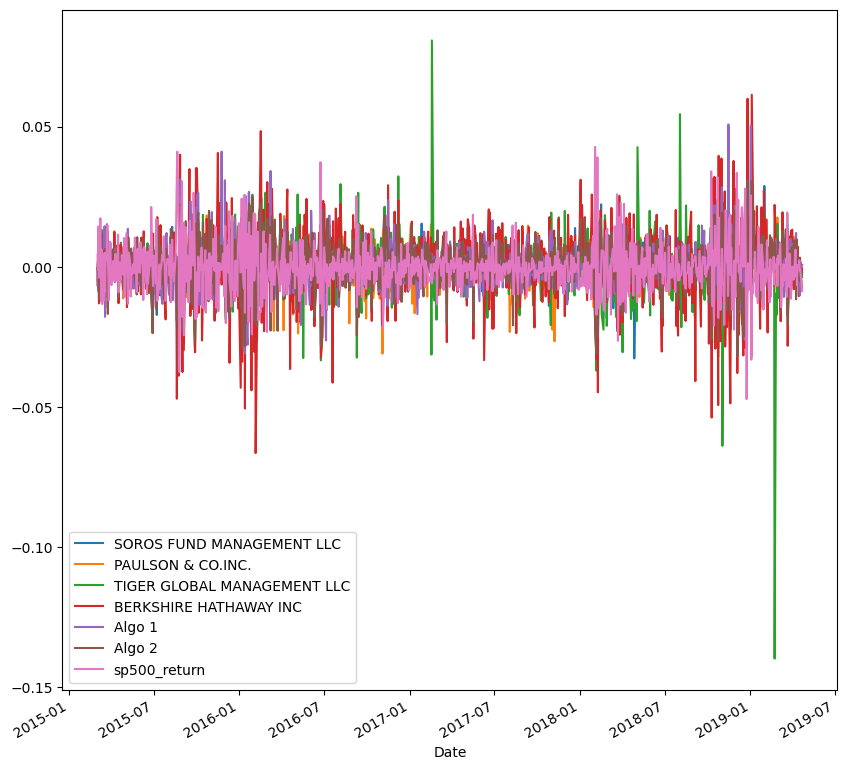

In [330]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(10,10)) 

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

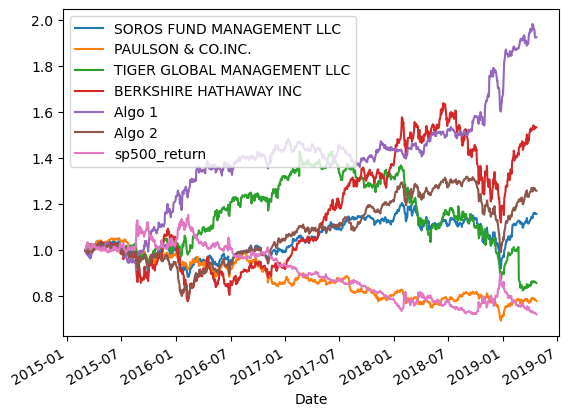

In [331]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio

<Axes: >

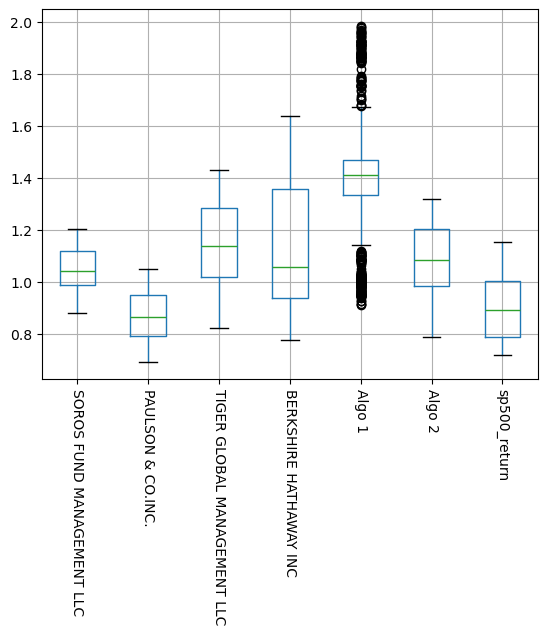

In [332]:
# Box plot to visually show risk
cumulative_returns.boxplot(rot=-90)

### Calculate Standard Deviations

In [333]:
# Calculate the daily standard deviations of all portfolios
volatility = combined_df.std()
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
sp500_return                   0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [334]:
# Calculate  the daily standard deviation of S&P 500
"Completed above"
# Determine which portfolios are riskier than the S&P 500
"Since TIGER and BERKSHIRE have std greater than sp500, that means their fluctations prove them to be riskier."

'Since TIGER and BERKSHIRE have std greater than sp500, that means their fluctations prove them to be riskier.'

### Calculate the Annualized Standard Deviation

In [335]:
# Calculate the annualized standard deviation (252 trading days)
volatility_ann = combined_df.std() * np.sqrt(252)
volatility_ann.sort_values(inplace=True)
volatility_ann

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
sp500_return                   0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

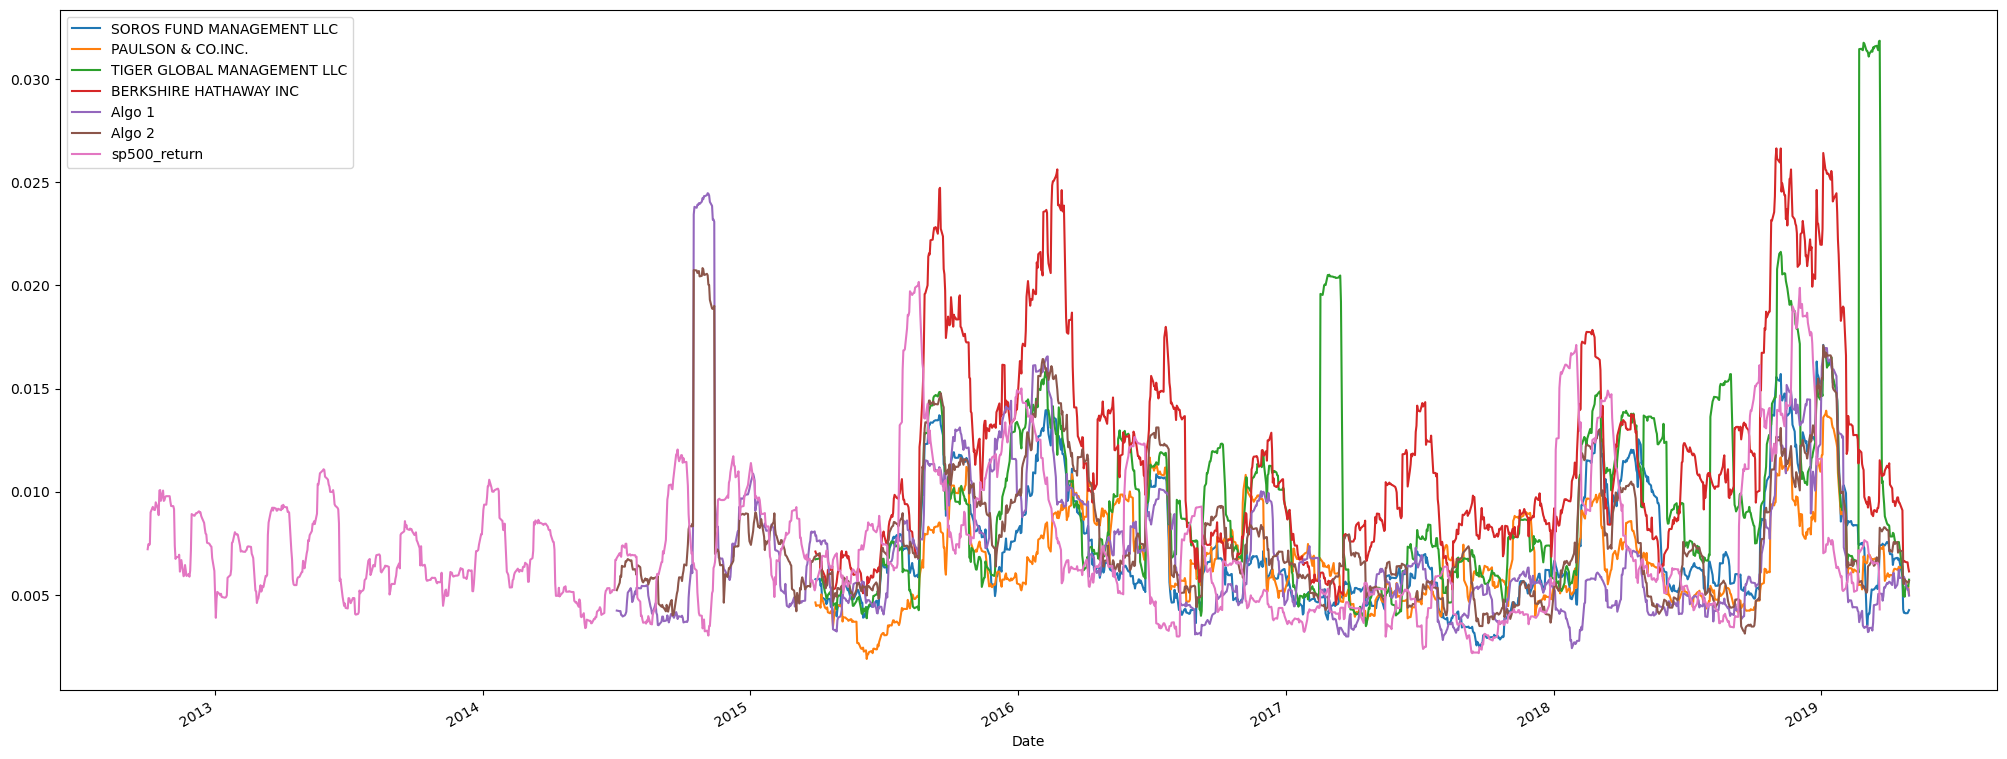

In [336]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_roll_std = whale_df_full.rolling(window=21).std()
algo_roll_std = algo_df_full.rolling(window=21).std()
sp500_roll_std = daily_returns_df_full.rolling(window=21).std()
# Plot the rolling standard deviation
ax = whale_roll_std.plot(figsize=(25,10))

algo_roll_std.plot(ax = ax)
sp500_roll_std.plot(ax = ax)


### Calculate and plot the correlation

<Axes: >

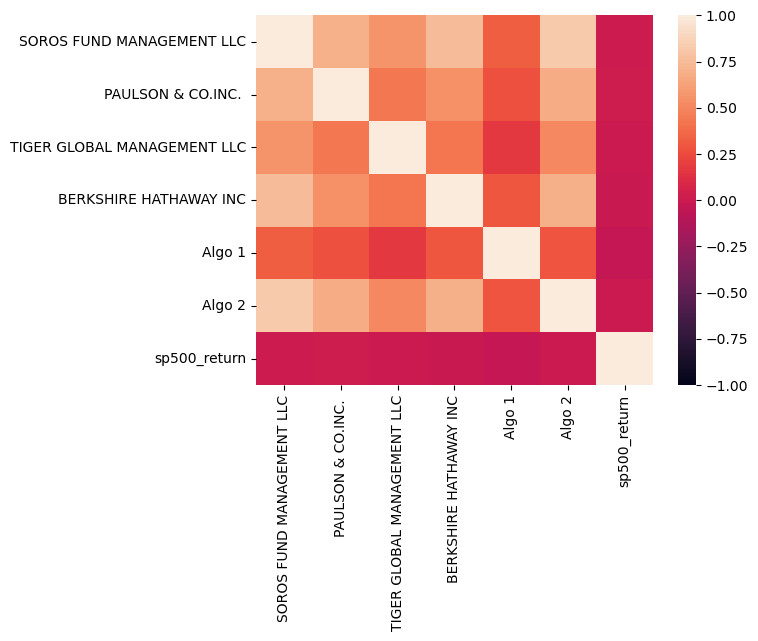

In [337]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

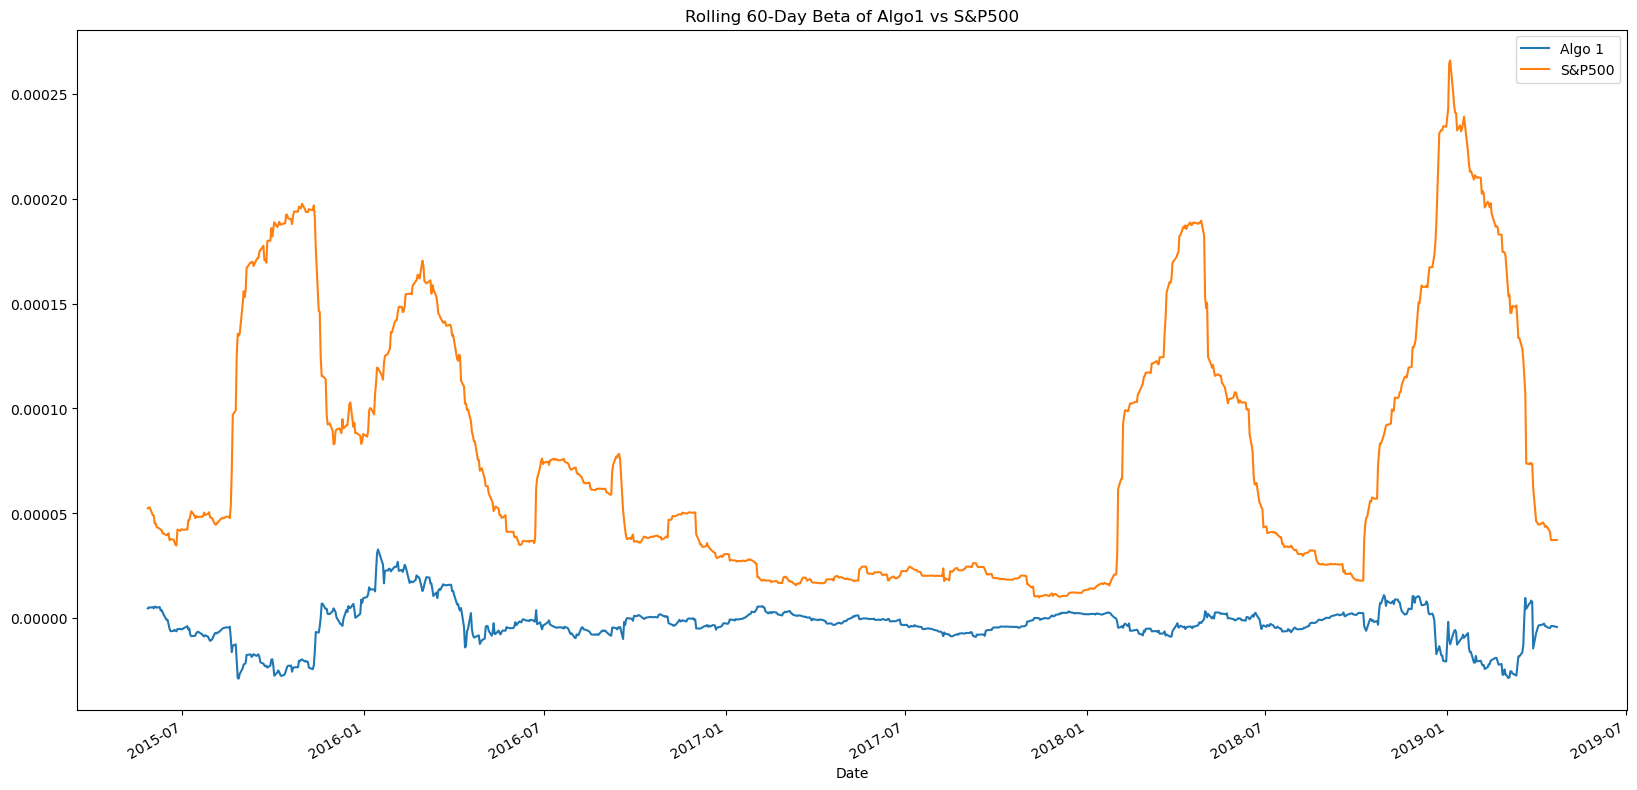

In [338]:
# Calculate covariance of a single portfolio
algo1_cov = combined_df['Algo 1'].cov(combined_df['sp500_return'])
# Calculate variance of S&P 500
variance = combined_df['sp500_return'].var()
variance
# Computing beta
beta = algo1_cov/variance
# Plot beta trend

rolling_algo1_cov = combined_df['Algo 1'].rolling(window=60).cov(combined_df['sp500_return'])
# Calculate 30-day rolling variance of S&P 500
rolling_variance = combined_df['sp500_return'].rolling(window=60).var()

# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_algo1_cov.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo1 vs S&P500')
rolling_variance.plot(ax=ax)

ax.legend(['Algo 1', 'S&P500'])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

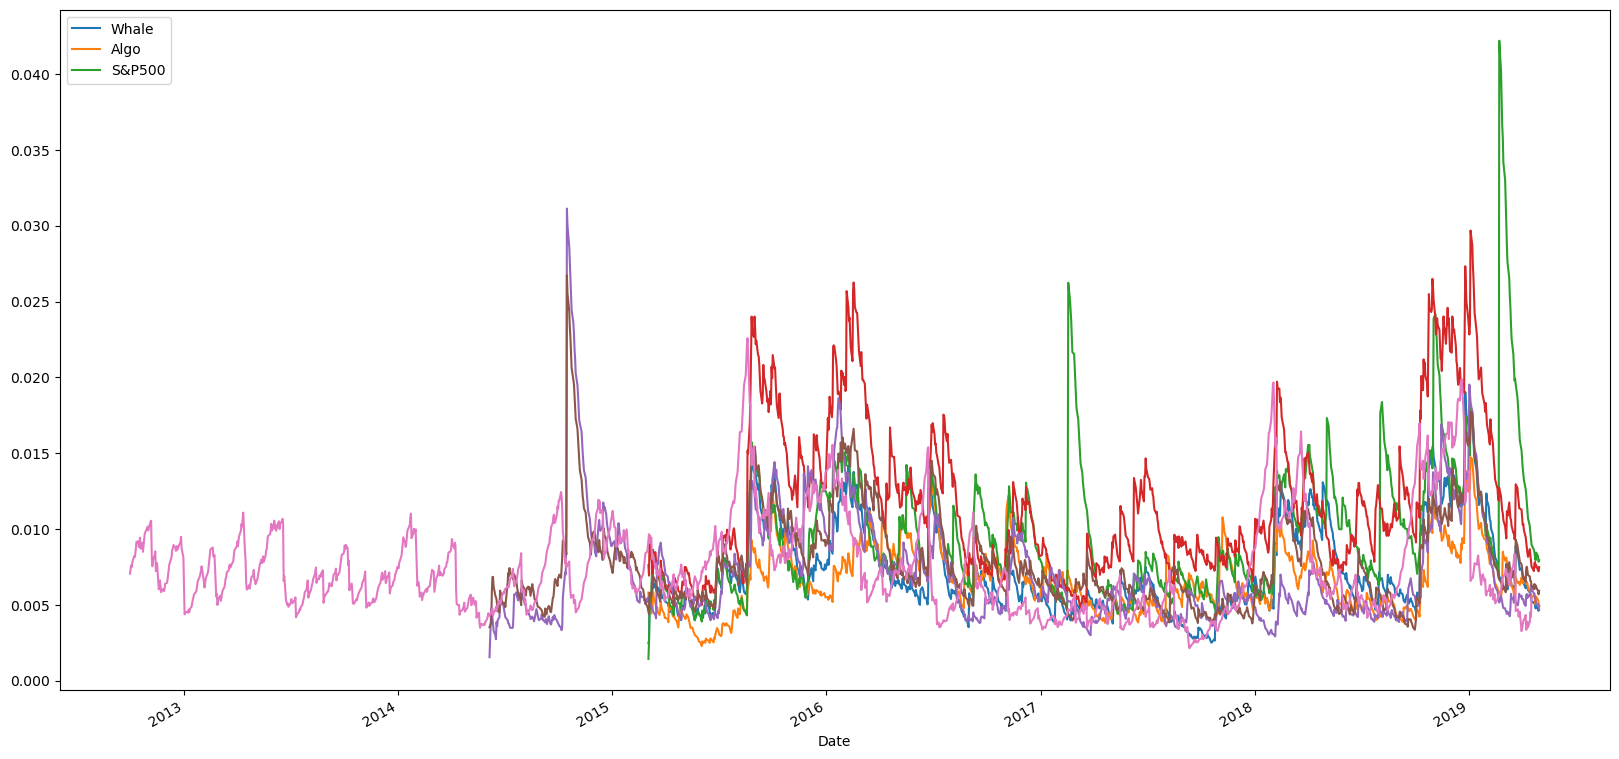

In [339]:
# Use `ewm` to calculate the rolling window
ewma_whale = whale_df_full.ewm(span=21).std()
ewma_algo = algo_df_full.ewm(span=21).std()
ewma_daily_returns = daily_returns_df_full.ewm(span=21).std()
ax = ewma_whale.plot(figsize=(20,10))
ewma_algo.plot(ax=ax)
ewma_daily_returns.plot(ax=ax)
ax.legend(['Whale', 'Algo', 'S&P500'])

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [340]:
# Annualized Sharpe Ratios
average_return = combined_df.mean()
risk_free_rate = 0.1
sharpe_ratios = (average_return-risk_free_rate)/volatility_ann

<Axes: title={'center': 'Sharpe Ratios'}>

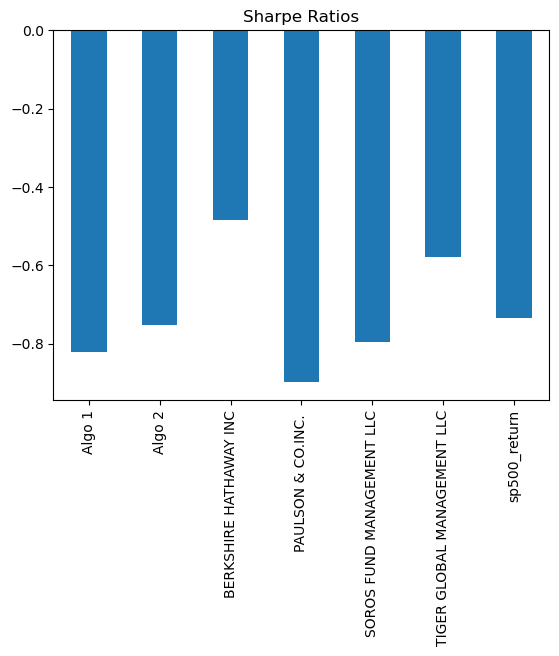

In [341]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The algorithmic strategies outperform only some of the Whales portfolios. It outperforms Paulson & Co. INC. and SOROS.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [342]:
# Reading data from 1st stock
aapl_path = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_path, index_col='Trade DATE')
aapl_df.head()

Symbol    NOCP
Trade DATE               
5/9/2019     AAPL  200.72
5/8/2019     AAPL  202.90
5/7/2019     AAPL  202.86
5/6/2019     AAPL  208.48
5/3/2019     AAPL  211.75

In [343]:
# Reading data from 2nd stock
cost_path = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_path, index_col='Trade DATE')
cost_df.head()

Symbol    NOCP
Trade DATE               
5/9/2019     COST  243.47
5/8/2019     COST  241.34
5/7/2019     COST  240.18
5/6/2019     COST  244.23
5/3/2019     COST  244.62

In [344]:
# Reading data from 3rd stock
goog_path = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_path, index_col='Trade DATE')
goog_df.head()

Symbol     NOCP
Trade DATE                
5/9/2019     GOOG  1162.38
5/8/2019     GOOG  1166.27
5/7/2019     GOOG  1174.10
5/6/2019     GOOG  1189.39
5/3/2019     GOOG  1185.40

In [345]:
# Combine all stocks in a single DataFrame
# encountering issues with duplicate Trade DATE
# fixed issue by reading in data with index by Trade DATE
all_stocks_df = pd.concat([aapl_df, cost_df, goog_df], axis='columns', join='inner')
all_stocks_df.head()

Symbol    NOCP Symbol    NOCP Symbol     NOCP
Trade DATE                                              
5/9/2019     AAPL  200.72   COST  243.47   GOOG  1162.38
5/8/2019     AAPL  202.90   COST  241.34   GOOG  1166.27
5/7/2019     AAPL  202.86   COST  240.18   GOOG  1174.10
5/6/2019     AAPL  208.48   COST  244.23   GOOG  1189.39
5/3/2019     AAPL  211.75   COST  244.62   GOOG  1185.40

In [346]:
# Reset Date index
all_stocks_df.index.name = 'Date'
all_stocks_df.index = pd.to_datetime(all_stocks_df.index, infer_datetime_format=True)
all_stocks_df.head()

/var/folders/jp/x_d0tm_j75v5bcxxbpv_nllh0000gp/T/ipykernel_53820/3063619198.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  all_stocks_df.index = pd.to_datetime(all_stocks_df.index, infer_datetime_format=True)


Symbol    NOCP Symbol    NOCP Symbol     NOCP
Date                                                    
2019-05-09   AAPL  200.72   COST  243.47   GOOG  1162.38
2019-05-08   AAPL  202.90   COST  241.34   GOOG  1166.27
2019-05-07   AAPL  202.86   COST  240.18   GOOG  1174.10
2019-05-06   AAPL  208.48   COST  244.23   GOOG  1189.39
2019-05-03   AAPL  211.75   COST  244.62   GOOG  1185.40

In [347]:
# Reorganize portfolio data by having a column per symbol
# having some toruble reorganizing my table
# I'm gonna settle on changing the NOCP column names to a stock name, then deleting the Symbol columns
all_stocks_df.columns = ['delete', 'AAPL', 'delete1', 'COST', 'delete2', 'GOOG']
all_stocks_df.drop(columns=['delete','delete1','delete2'],inplace=True)
all_stocks_df.head()

AAPL    COST     GOOG
Date                               
2019-05-09  200.72  243.47  1162.38
2019-05-08  202.90  241.34  1166.27
2019-05-07  202.86  240.18  1174.10
2019-05-06  208.48  244.23  1189.39
2019-05-03  211.75  244.62  1185.40

In [368]:
# Calculate daily returns
stocks_daily_returns = all_stocks_df.pct_change()
stocks_daily_returns.head()
# Drop NAs
stocks_daily_returns = stocks_daily_returns.dropna()
# Display sample data
stocks_daily_returns.head()

AAPL      COST      GOOG
Date                                    
2019-05-08  0.010861 -0.008749  0.003347
2019-05-07 -0.000197 -0.004806  0.006714
2019-05-06  0.027704  0.016862  0.013023
2019-05-03  0.015685  0.001597 -0.003355
2019-05-02 -0.012279 -0.007890 -0.019226

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [369]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = stocks_daily_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [371]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios_df = pd.concat([combined_df, portfolio_returns], axis='columns', join='inner')
all_portfolios_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-05-11                  -0.004717            0.000982   
2018-05-14                   0.000000            0.000000   
2018-05-15                  -0.000726           -0.001409   
2018-05-16                   0.008637            0.006244   
2018-05-17                  -0.001955            0.002524   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-05-11                     0.002624               -0.004125  0.000358   
2018-05-14                     0.000000                0.000000  0.000915   
2018-05-15                    -0.003189               -0.014606 -0.001135   
2018-05-16                     0.005480                0.004310 -0.002326   
2018-05-17                    -0.006267               -0.005140 -0.006949   

              Algo 2  sp500_return         0  
Date                                          
2018-05-11  0.000281     -0.000883 -0.000012  
2018-05-14  0.001635      0.006889  0.010216  
2018-05-15 -0.001139     -0.004044 -0.009283  
2018-05-16  0.003341      0.000857  0.001618  
2018-05-17  0.005205      0.002639  0.006112

In [372]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios_df = all_portfolios_df.dropna()
all_portfolios_df.isnull().sum()
all_portfolios_df

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-05-11                  -0.004717            0.000982   
2018-05-14                   0.000000            0.000000   
2018-05-15                  -0.000726           -0.001409   
2018-05-16                   0.008637            0.006244   
2018-05-17                  -0.001955            0.002524   
...                               ...                 ...   
2019-04-15                  -0.001422           -0.001156   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-05-11                     0.002624               -0.004125  0.000358   
2018-05-14                     0.000000                0.000000  0.000915   
2018-05-15                    -0.003189               -0.014606 -0.001135   
2018-05-16                     0.005480                0.004310 -0.002326   
2018-05-17                    -0.006267               -0.005140 -0.006949   
...                                 ...                     ...       ...   
2019-04-15                     0.000398               -0.010492 -0.004331   
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   

              Algo 2  sp500_return         0  
Date                                          
2018-05-11  0.000281     -0.000883 -0.000012  
2018-05-14  0.001635      0.006889  0.010216  
2018-05-15 -0.001139     -0.004044 -0.009283  
2018-05-16  0.003341      0.000857  0.001618  
2018-05-17  0.005205      0.002639  0.006112  
...              ...           ...       ...  
2019-04-15 -0.004572     -0.000509 -0.000326  
2019-04-16  0.002899      0.002279 -0.009149  
2019-04-17 -0.005228     -0.001577 -0.001541  
2019-04-18 -0.001229     -0.001011 -0.001148  
2019-04-22 -0.001936     -0.008764 -0.011812  

[237 rows x 8 columns]

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [373]:
# Calculate the annualized `std`
new_ann_std = all_portfolios_df.std() * np.sqrt(252)
new_ann_std.sort_values(inplace=True)
new_ann_std

PAULSON & CO.INC.              0.116683
Algo 1                         0.133645
Algo 2                         0.139204
SOROS FUND MANAGEMENT LLC      0.146589
sp500_return                   0.152147
0                              0.213137
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

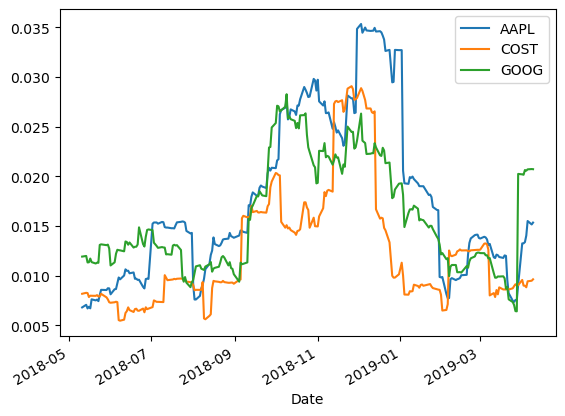

In [374]:
# Calculate rolling standard deviation
new_roll_std = stocks_daily_returns.rolling(window=21).std()

# Plot rolling standard deviation
new_roll_std.plot()

### Calculate and plot the correlation

<Axes: >

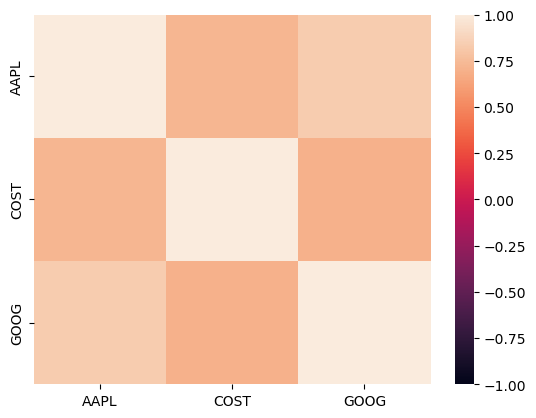

In [375]:
# Calculate and plot the correlation
new_corr = new_roll_std.corr()
sns.heatmap(new_corr, vmin = -1, vmax = 1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: xlabel='Date'>

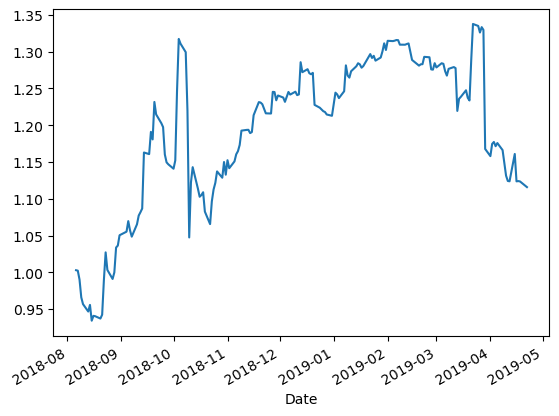

In [385]:
# Calculate and plot Beta
rolling_stock_cov = portfolio_returns.rolling(window=60).cov(all_portfolios_df['sp500_return'])
rolling_var = all_portfolios_df['sp500_return'].rolling(window=60).var()

beta_rolling = rolling_stock_cov / rolling_var
beta_rolling.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [394]:
# Calculate Annualized Sharpe Ratios
# 'stocks_daily_returns' is our daily returns for 3 indiv stocks

vol_ann = stocks_daily_returns.std() * np.sqrt(252)
vol_ann.sort_values(inplace=True)

avg_return = portfolio_returns.mean()
risk_free_rate = 0.1
sh_ratios = (avg_return-risk_free_rate)/vol_ann
sh_ratios

COST   -0.470211
GOOG   -0.378094
AAPL   -0.333958
dtype: float64

<Axes: >

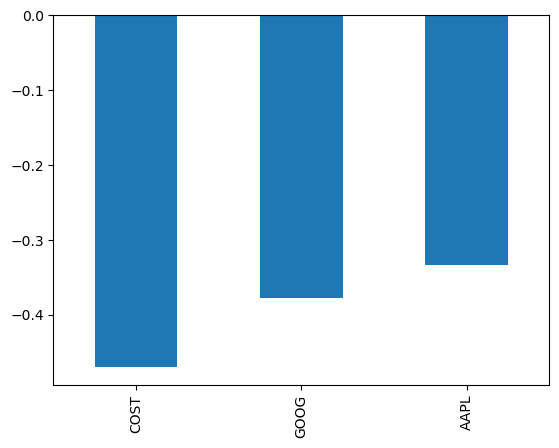

In [393]:
# Visualize the sharpe ratios as a bar plot
sh_ratios.plot.bar()

### How does your portfolio do?

I believe our portfolio is relatively okay. Our sharpe ratios for each of the 3 stsocks are similar to Berkshire Hathaway's holdings. I think it's solid.